In [25]:
import pandas as pd

# LOAD full visual features
ep1 = pd.read_csv('../data/ep1_visual_full.csv')
ep2 = pd.read_csv('../data/ep2_visual_full.csv')
ep3 = pd.read_csv('../data/ep3_visual_full.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (787) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
from sklearn.model_selection import train_test_split

# MERGE
DATA = pd.concat([ep1, ep2, ep3])
X = DATA.filter(regex=("_hist"))
Y = DATA.ws_video

# SPLIT
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42, stratify=Y)

Accuracy:   0.9988
Precision:  0.9486
Recall:     0.9227
F1:         0.9355


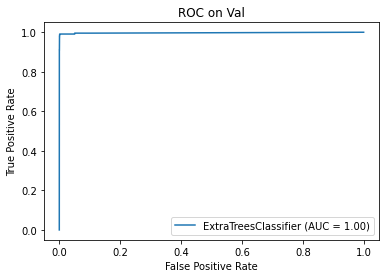

CPU times: user 52.9 s, sys: 54.3 ms, total: 52.9 s
Wall time: 53.1 s


In [37]:
%%time
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve

# use tpot classifier
pipe = ExtraTreesClassifier(bootstrap=True, criterion="gini", max_features=0.25, min_samples_leaf=8, min_samples_split=11, n_estimators=100)
if hasattr(pipe, 'random_state'):
    setattr(pipe, 'random_state', 42)

pipe.fit(x_train, y_train)

preds = pipe.predict(x_test)
print("Accuracy:  ", round(accuracy_score(y_test,preds),4) )
print("Precision: ", round(precision_score(y_test,preds),4) )
print("Recall:    ", round(recall_score(y_test,preds),4) )
print("F1:        ", round(f1_score(y_test,preds),4) )

plot_roc_curve(pipe, x_test, y_test)
plt.title("ROC on Val")
plt.show()